In [37]:
import pandas as pd
# 2. Collecte des données
# On précise que le séparateur est un point-virgule avec sep=';'
df = pd.read_csv('animes.csv', sep=';' , skiprows=1)
# On vérifie que la lecture a fonctionné en affichant le début du tableau
df.head(62)

,,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,SPY×FAMILY,Comedy / Slice of Life,Manga,37,En cours,Wit / CloverWorks,2022-04-09,8.4,9.1,Ep 2: Secure a Wife,L'introduction de Yor. Mélange parfait d'actio...,7.8,Ep 17: Carry Out the Griffon Plan,"Episode plus léger 'Slice of Life', moins d'en...",La dynamique familiale Forger est le coeur de ...,Anya est une icône de la culture anime moderne.,NaN
57,Dan Da Dan,Action / Supernatural,Manga,12,En cours,Science SARU,2024-10-04,8.4,9.7,Ep 7: Acrobatic Silky,Une histoire tragique et émouvante derrière le...,7.9,Ep 12: Let's Go to the Cursed House,Fin de saison un peu abrupte pour certains.,Animation déjantée et créative typique de Scie...,"Mélange unique d'occulte, d'aliens et de roman...",NaN
58,Made in Abyss,Adventure / Mystery,Manga,25,En cours,Kinema Citrus,2017-07-07,8.6,9.6,Ep 13: The Challengers,Un épisode final d'une beauté et d'une cruauté...,7.5,Ep 6: Incinerator,"Episode d'entraînement, nécessaire mais moins ...",Contraste brutal entre le design 'Chibi' et l'...,Un voyage sans retour vers les profondeurs tra...,NaN
59,Kuroko's Basket,Sport / Basketball,Manga,75,Fini,Production I.G,2012-04-07,8.1,9.0,Ep 24: Don't Get the Wrong Idea,Kise vs Aomine. Le duel de la Génération des M...,7.3,Ep 5: Your Basketball,"Mise en place de l'équipe, rythme plus lent.",Basket avec des super-pouvoirs assumés ('The Z...,Animation fluide et intensité des matchs incom...,NaN


In [38]:
# 1. On cherche les valeurs manquante
print("Valeurs manquantes par colonne :")
print(df.isna().sum())

# 2. On cherche les lignes doublons
print("\nNombre de doublons :", df.duplicated().sum())

# 3. On vérifie le "format" de chaque colonne
print("\nTypes de colonnes :")
print(df.dtypes)

Valeurs manquantes par colonne :
                      0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64

Nombre de doublons : 2

Types de colonnes :
                      object
Genre_Tags            object
Source                object
Nb_Episodes            int64
Status                object
Studio                object
Date_Pub              object
Note_Globale         float64
Note_Meilleur_Ep     float64
Meilleur_Ep_Titre     object
Comm_Meilleur_Ep      object
Note_Pire_Ep         float64
Pire_Ep_Titre         object
Comm_Pire_Ep          object
Comm_Saison_1         object
Comm_Saison_2         object
Comm_Saison_3         object
dtype: o

In [39]:
# 1. On crée une copie pour travailler sans abîmer le tableau original
df_clean = df.copy()

# 2. Supprimer les lignes avec des valeurs manquantes
# On se concentre sur les animés qui ont toutes leurs infos
df_clean = df_clean.dropna()

# 3. Supprimer les 14 doublons pour ne pas compter deux fois le même animé
df_clean = df_clean.drop_duplicates()

print("Données nettoyées ! ✅")
# On affiche le résultat pour vérifier
display(df_clean)

,,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.
5,Sword Art Online,Isekai / Romance,Light Novel,25,Fini,A-1 Pictures,2012-07-08,7.2,8.9,Ep 9: Le démon aux yeux bleus,"Hype absolue, révélation du Dual Wield.",5.9,Ep 22: La grande quête (Alfheim),Rythme lent et enjeux faibles dans l'arc des f...,"Concept 'Jeu de la mort' accrocheur, romance f...","Chute de qualité, méchant caricatural et moins...",Retour en force avec Gun Gale Online et ton pl...
6,Re:Zero,Isekai / Psychologique,Light Novel,50,Fini,White Fox,2016-04-04,8.2,9.8,Ep 15: L'extérieur de la folie,"Chef d'oeuvre d'horreur et de désespoir, fin l...",7.6,Ep 13: Le chevalier autoproclamé,"Episode gênant (cringe) voulu par le scénario,...",Boucle temporelle et basculement vers le thril...,Arc Sanctuaire dense en dialogues et passé des...,"Résolution intelligente, Subaru grandit et uti..."
7,Dr. Stone,Sci-Fi / Adventure,Manga,57,En cours,TMS Entertainment,2019-07-05,8.3,9.1,Ep 24: Les voix vers l'infini,"Conclusion S1 émouvante, lien passé-futur subl...",7.1,Ep 14: Master of Flame,"Rythme un peu plus lent, préparation de tournoi.","Le réveil dans un monde de pierre, la science ...",Stone Wars : Conflit idéologique et batailles ...,New World : Exploration maritime et découverte...
8,One Piece,Adventure / Shonen,Manga,1090,En cours,Toei Animation,1999-10-20,8.7,9.8,Ep 1015: Chapeau de Paille Luffy,"Réalisation cinéma époustouflante, sommet de W...",5.6,Ep 336: Chopperman (Filler),Episode hors-série enfantin totalement dispens...,"Saga East Blue : La formation de l'équipage, n...",Saga Alabasta : Premier grand défi géopolitiqu...,Saga Skypiea/Water 7 : Aventure céleste puis d...
9,Blue Lock,Sport / Thriller,Manga,36,En cours,8bit,2022-10-09,8.2,9.3,Ep 11: La dernière pièce,"Le puzzle s'assemble, le but d'Isagi est jouis...",6.0,Ep 22: Voice (S2),"Qualité d'animation en baisse critique, beauco...","Concept Battle Royale de foot, égoïsme pur mis...","Sélection U-20, enjeux d'équipe vs individualité.

In [47]:
# 4. Enrichir les données
# On utilise Score_Engagement = Note_Globale * Nb_Episodes
df_clean['Score_Engagement'] = df_clean['Note_Globale'] * df_clean['Nb_Episodes']

print("Données enrichies ! 🚀")
display(df_clean.head(49))

,,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3,Score_Engagement
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.,1848.0
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...,213.2
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é...",2531.7
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo...",582.4
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.,228.8
5,Sword Art Online,Isekai / Romance,Light Novel,25,Fini,A-1 Pictures,2012-07-08,7.2,8.9,Ep 9: Le démon aux yeux bleus,"Hype absolue, révélation du Dual Wield.",5.9,Ep 22: La grande quête (Alfheim),Rythme lent et enjeux faibles dans l'arc des f...,"Concept 'Jeu de la mort' accrocheur, romance f...","Chute de qualité, méchant caricatural et moins...",Retour en force avec Gun Gale Online et ton pl...,180.0
6,Re:Zero,Isekai / Psychologique,Light Novel,50,Fini,White Fox,2016-04-04,8.2,9.8,Ep 15: L'extérieur de la folie,"Chef d'oeuvre d'horreur et de désespoir, fin l...",7.6,Ep 13: Le chevalier autoproclamé,"Episode gênant (cringe) voulu par le scénario,...",Boucle temporelle et basculement vers le thril...,Arc Sanctuaire dense en dialogues et passé des...,"Résolution intelligente, Subaru grandit et uti...",410.0
7,Dr. Stone,Sci-Fi / Adventure,Manga,57,En cours,TMS Entertainment,2019-07-05,8.3,9.1,Ep 24: Les voix vers l'infini,"Conclusion S1 émouvante, lien passé-futur subl...",7.1,Ep 14: Master of Flame,"Rythme un peu plus lent, préparation de tournoi.","Le réveil dans un monde de pierre, la science ...",Stone Wars : Conflit idéologique et batailles ...,New World : Exploration maritime et découverte...,473.1
8,One Piece,Adventure / Shonen,Manga,1090,En cours,Toei Animation,1999-10-20,8.7,9.8,Ep 1015: Chapeau de Paille Luffy,"Réalisation cinéma époustouflante, sommet de W...",5.6,Ep 336: Chopperman (Filler),Episode hors-série enfantin totalement dispens...,"Saga East Blue : La formation de l'équipage, n...",Saga Alabasta : Premier grand défi géopolitiqu...,Saga Skypiea/Water 7 : Aventure céleste puis d...,9483.0
9,Blue Lock,Sport / Thriller,Manga,36,En cours,8bit,2022-10-09,8.2,9.3,Ep 11: La dernière pièce,"Le puzzle s'assemble, le but d'Isagi est jouis...",6.0,Ep 22: Voice (S2),"Qualité d'animation en baisse critique, beauco...","Concept Battle Royale de fo

In [48]:
# 5. Analyse Statistique
# On calcule les statistiques sur Score_Engagement
score_min = df_clean['Score_Engagement'].min()
score_max = df_clean['Score_Engagement'].max()
score_moyenne = df_clean['Score_Engagement'].mean()
score_mediane = df_clean['Score_Engagement'].median()

print(f"📈 Engagement Min: {score_min:.2f} | Max: {score_max:.2f}")
print(f"📈 Moyenne: {score_moyenne:.2f} | Médiane: {score_mediane:.2f}")

📈 Engagement Min: 24.00 | Max: 9483.00
📈 Moyenne: 812.48 | Médiane: 340.30


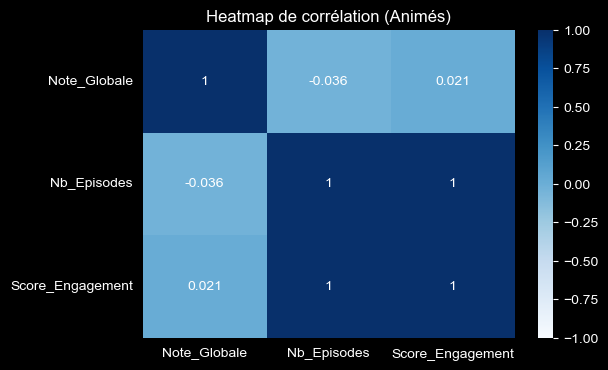

In [51]:
# 1. On sort les outils de dessin de la boîte
import matplotlib.pyplot as plt
import seaborn as sns

# 2. On regarde les liens entre les colonnes
correlation = df_clean[['Note_Globale', 'Nb_Episodes', 'Score_Engagement']].corr()
display(correlation)

# 3. On crée la Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Heatmap de corrélation (Animés)")
plt.show()

In [53]:
# 6. Analyse par Genre (équivalent de l'analyse par produit du tuto)
resume_genres = df_clean.groupby('Genre_Tags').agg(
    Score_Total=('Score_Engagement', 'sum'),
    Total_Episodes=('Nb_Episodes', 'sum'),
    Note_Moyenne=('Note_Globale', 'mean'),
    Engagement_Moyen=('Score_Engagement', 'mean')
).sort_values(by='Score_Total', ascending=False)

# On calcule la part de chaque genre dans l'engagement total du catalogue
resume_genres['Part_Engagement'] = (resume_genres['Score_Total'] / resume_genres['Score_Total'].sum()) * 100

# On affiche le tableau final (le "Part du CA" de ton tuto)
display(resume_genres)

,Score_Total,Total_Episodes,Note_Moyenne,Engagement_Moyen,Part_Engagement
Genre_Tags,,,,,
Adventure / Shonen,10815.0,1238,8.850,5407.500,27.165654
Action / Shonen,10237.7,1304,7.825,2559.425,25.715563
Action / Supernatural,4923.1,606,8.300,984.620,12.366087
Action / Fantasy,1476.6,182,8.200,738.300,3.708997
Action / Historical,1256.0,150,8.400,628.000,3.154883
Action / Super Power,1189.0,151,7.750,594.500,2.986589
Action / Mystery,756.5,89,8.500,756.500,1.900214
Sport / Volley,739.5,85,8.700,739.500,1.857513
Sport / Boxing,668.8,76,8.800,668.800,1.679925


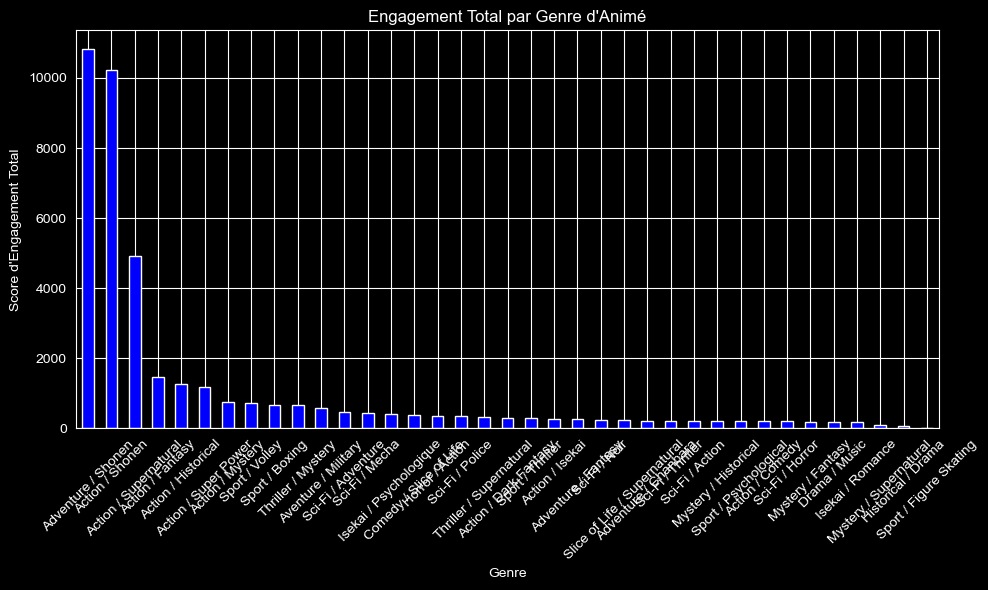

In [61]:
# 7. Visualisation
# On calcule l'engagement total par genre (équivalent du CA par produit)
engagement_par_genre = df_clean.groupby('Genre_Tags')['Score_Engagement'].sum().sort_values(ascending=False)

# On crée le graphique en barres
plt.figure(figsize=(10, 6))
engagement_par_genre.plot(kind='bar', color='blue')

# On ajoute les étiquettes comme dans le tuto
plt.title("Engagement Total par Genre d'Animé")
plt.ylabel('Score d\'Engagement Total')
plt.xlabel('Genre')
plt.xticks(rotation=45) # On incline un peu les noms pour qu'ils soient lisibles
plt.tight_layout()
plt.show()